# ‘Farming’ with ``Harvester`` Example

This examples demonstrates ‘farming’ runs, that is, using a {class}`~xyzpy.Harvester` to perform and combine succesive, disjoint sets of runs.

First we define a simple trig function to explore and label with a {class}`~xyzpy.Runner`:

In [1]:
%config InlineBackend.figure_formats = ['svg']
import xyzpy as xyz
import numpy as np


def trig(f, x, amp, phi):

    trig_fn = getattr(np, f)
    err = 0.2 + 0.1 * np.random.randn()

    return amp * trig_fn(x - phi), err


r = xyz.Runner(trig, ['f(x)', 'ef(x)'])

The harvester is composed of this ``Runner`` and logic for merging for saving each new set of runs.

In [2]:
h = xyz.Harvester(r, data_name='trig.h5')

We perform one set of runs first:

In [3]:
combos_1 = {
    'f': ['sin', 'cos'],
    'x': np.linspace(-5, 5, 101),
    'amp': [1, 2, 3],
    'phi': [0.4, 0.8],
}

In [4]:
h.harvest_combos(combos_1)

100%|##########| 1212/1212 [00:00<00:00, 548026.78it/s]


Which we can plot:

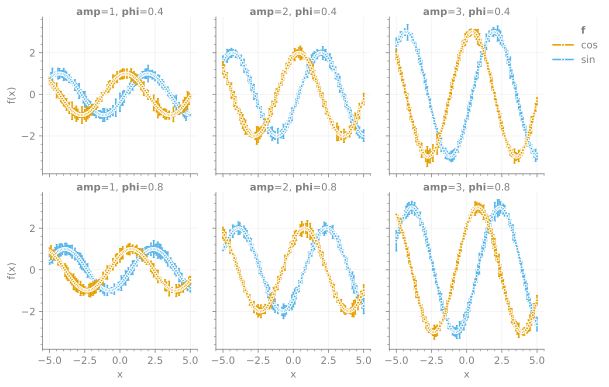

In [5]:
fig, axs = h.full_ds.xyz.plot(
    x='x',
    y='f(x)',
    color='f',
    col='amp',
    row='phi',
    err='ef(x)',
)

Then we can define and run a completely disjoint set of runs:

In [6]:
combos_2 = {
    'f': ['sin', 'cos'],
    'x': np.linspace(-5, 5, 101),
    'amp': [4, 5],
    'phi': [1.2, 1.6],
}

In [7]:
h.harvest_combos(combos_2)

100%|##########| 808/808 [00:00<00:00, 461464.82it/s]


If we plot the current ``full_ds`` we’ll see both sets of runs are present, but there are also blank spaces:

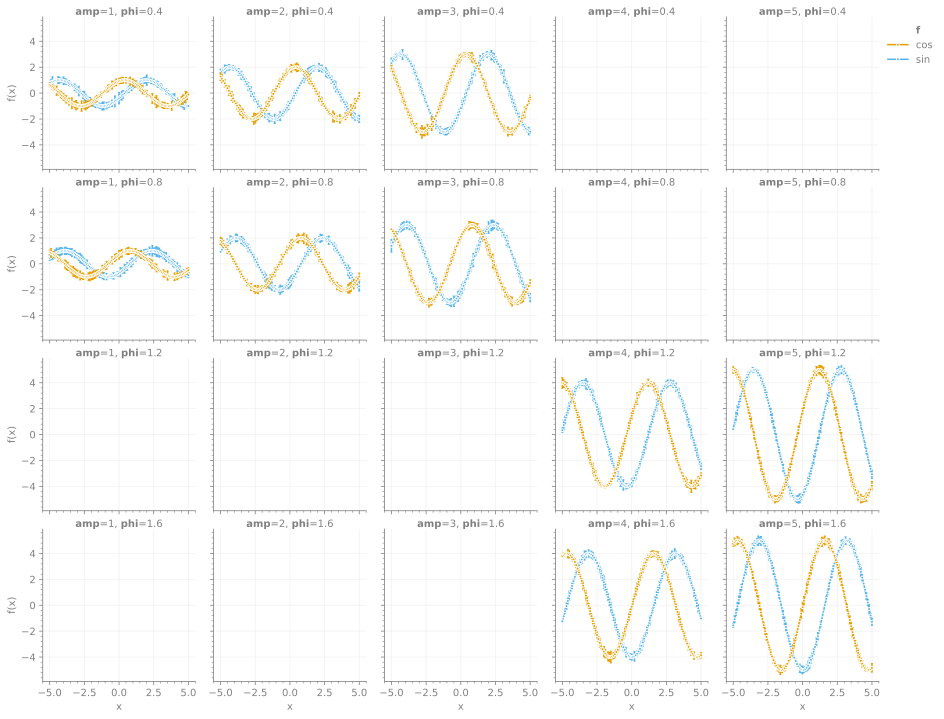

In [8]:
fig, axs = h.full_ds.xyz.plot(
    x='x',
    y='f(x)',
    color='f',
    col='amp',
    row='phi',
    err='ef(x)',
)

Finally let’s add ``tan`` into the mix, but only for the central combinations:

In [9]:
combos_3 = {
    'f': ['tan'],
    'x': np.linspace(-5, 5, 101),
    'amp': [2, 3, 4],
    'phi': [0.8, 1.2],
}

In [10]:
h.harvest_combos(combos_3)

100%|##########| 606/606 [00:00<00:00, 84516.47it/s]


We’ll specify some plotting limits to avoid the infinities as well:

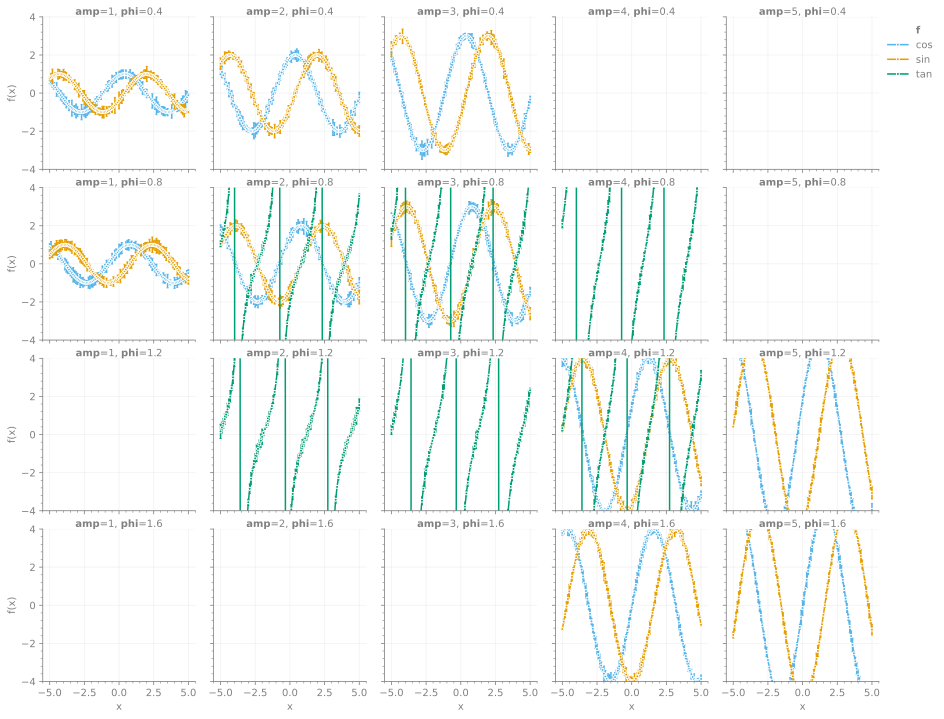

In [11]:
fig, axs = h.full_ds.xyz.plot(
    x='x',
    y='f(x)',
    color='f',
    col='amp',
    row='phi',
    err='ef(x)',
    ylim=(-4, 4),
)

All runs have also been accumulated into the on-disk:

In [12]:
!ls *.h5

trig.h5


In [13]:
xyz.load_ds('trig.h5')

<xarray.Dataset>
Dimensions:  (f: 3, x: 101, amp: 5, phi: 4)
Coordinates:
  * f        (f) <U3 'cos' 'sin' 'tan'
  * x        (x) float64 -5.0 -4.9 -4.8 -4.7 -4.6 -4.5 ... 4.6 4.7 4.8 4.9 5.0
  * amp      (amp) int64 1 2 3 4 5
  * phi      (phi) float64 0.4 0.8 1.2 1.6
Data variables:
    f(x)     (f, x, amp, phi) float64 0.6347 0.8855 nan nan ... nan nan nan nan
    ef(x)    (f, x, amp, phi) float64 0.1428 0.1683 nan nan ... nan nan nan nan

For now just clean this up.

In [14]:
h.delete_ds()